In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [2]:
# zgrep 'rs1483979:' /labs/mignot/DGN2019_Imputations/CHR14_GenRED.II.autosomalClean.Final.impute.gz 
scores = "1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0.010 0.990 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.001 0.999 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.999 0.001 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.904 0.096 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0.995 0.005 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.012 0.988 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0.998 0.002 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.994 0.006 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0.001 0.999 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0.013 0.987 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0.836 0.164 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.989 0.011 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0.550 0.450 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0.980 0.020 0 1 0 0.349 0.651 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0.964 0.036 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0.999 0.001 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.981 0.019 0 1 0 0 0.993 0.007 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0.007 0.993 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0.446 0.554 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0.961 0.039 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.060 0.940 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.878 0.122 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.996 0.004 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0.984 0.016 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.003 0.997 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.973 0.027 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.840 0.160 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0.996 0.004 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0.998 0.002 0 1 0 0 1 0 0 1 0 0 0.836 0.164 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.988 0.012 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.939 0.061 0 1 0 0 0.992 0.008 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.018 0.982 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.801 0.199 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0.978 0.022 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0.001 0.999 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0.984 0.016 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0.993 0.007 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.001 0.999 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0.952 0.048 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.054 0.946 0 0 1 0 1 0 0 1 0 0 0.998 0.002 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0.053 0.947 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0.998 0.002 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0.985 0.015 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 1 0 0 1 0 0 0.836 0.164 0 1 0 0 0 0.999 0.001 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.855 0.145 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.651 0.349 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0.997 0.003 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0.999 0.001 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.010 0.990 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.012 0.988 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0.568 0.432 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0.999 0.001 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.082 0.918 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0.999 0.001 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1"

In [3]:
scores = [float(x) for x in scores.split(" ")]

In [4]:
print("There are {} people".format(len(scores)//3))

There are 2226 people


In [5]:
assert len(scores) % 3 == 0

In [6]:
scores = [scores[i:i+3] for i in range(0, len(scores)-2, 3)] # split into groups of 3

In [7]:
scores

[[1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0

In [8]:
print("There are {} people".format(len(scores)))

There are 2226 people


In [9]:
genotypes = [np.argmax(score) for score in scores]

In [10]:
genotypes

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


(array([1588.,    0.,    0.,    0.,    0.,  586.,    0.,    0.,    0.,
          52.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

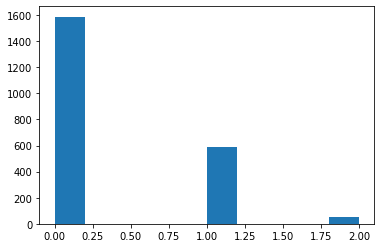

In [11]:
plt.hist(genotypes)

In [12]:
genotypes.count(0), genotypes.count(1), genotypes.count(2) # GG, GC, CC

(1588, 586, 52)

In [13]:
df = pd.read_csv("/labs/mignot/DGN2019_Imputations/GenRED.II.autosomalClean.Final_CHR14.sample", delimiter=" ")

In [14]:
len(df)

2227

In [15]:
df.head()

,ID_1,ID_2,missing,father,mother,sex,plink_pheno
0,0,0,0,D,D,D,B
1,WG0117063-DNAA01_8000066550_LD0014,WG0117063-DNAA01_8000066550_LD0014,0,0,0,1,1
2,WG0117063-DNAA02_8000066573_LD0041,WG0117063-DNAA02_8000066573_LD0041,0,0,0,1,1
3,WG0117063-DNAA04_8000066599_LD0038,WG0117063-DNAA04_8000066599_LD0038,0,0,0,2,1
4,WG0117063-DNAA05_8000066582_LD0084,WG0117063-DNAA05_8000066582_LD0084,0,0,0,1,1


In [16]:
df.tail(5)

,ID_1,ID_2,missing,father,mother,sex,plink_pheno
2222,WG0117087-DNAG04_286-60708,WG0117087-DNAG04_286-60708,0,0,0,2,2
2223,WG0117087-DNAH01_286-60676,WG0117087-DNAH01_286-60676,0,0,0,2,2
2224,WG0117087-DNAH02_286-60685,WG0117087-DNAH02_286-60685,0,0,0,2,2
2225,WG0117087-DNAH03_GPC-270-23470,WG0117087-DNAH03_GPC-270-23470,0,0,0,1,1
2226,WG0117087-DNAH04_sobell-3402,WG0117087-DNAH04_sobell-3402,0,0,0,1,1


In [17]:
ids_arr = df.ID_1.apply(lambda x: x.split("_")[-1])

In [18]:
ids_arr

0                   0
1              LD0014
2              LD0041
3              LD0038
4              LD0084
            ...      
2222        286-60708
2223        286-60676
2224        286-60685
2225    GPC-270-23470
2226      sobell-3402
Name: ID_1, Length: 2227, dtype: object

In [19]:
ids = ids_arr.values[1:] # first row is placeholder?
ids

array(['LD0014', 'LD0041', 'LD0038', ..., '286-60685', 'GPC-270-23470',
       'sobell-3402'], dtype=object)

In [20]:
len(ids)

2226

In [21]:
assert len(ids) == len(scores)

In [22]:
ids

array(['LD0014', 'LD0041', 'LD0038', ..., '286-60685', 'GPC-270-23470',
       'sobell-3402'], dtype=object)

In [23]:
subject_ids = os.listdir("/labs/mignot/DGN/DGN_fastq/rawdata") # the people for which we have RNASeq data

In [24]:
len(genotypes)

2226

In [25]:
print(len(subject_ids)) # number of people in the folder

937


In [26]:
subject_genotype_dict = dict()
genotype_subject_dict = {0:[], 1:[], 2:[]}

In [27]:
for i, my_id in enumerate(ids): # for each sample that we have the genotype for
    if my_id in subject_ids: # if they are in our DGN RNASeq folder
        my_genotype = genotypes[i] # the order of the ids list is the same as the order of the genotypes list
        assert my_genotype in {0, 1, 2}
        subject_genotype_dict[my_id] = my_genotype # associate id with genotype
        genotype_subject_dict[my_genotype].append(my_id) # add id to genotype list

In [28]:
# intersection=922 is the correct number, as per the Sharon paper
print("There are {} subjects with genotypes, {} subjects with RNASeq data, intersection is {} people.".format(len(ids), len(subject_ids), len(subject_genotype_dict)))

There are 2226 subjects with genotypes, 937 subjects with RNASeq data, intersection is 922 people.


In [29]:
final_subject_ids = list(subject_genotype_dict.keys())
final_subject_genotypes = list(subject_genotype_dict.values())

In [30]:
len(genotype_subject_dict[0]), len(genotype_subject_dict[1]), len(genotype_subject_dict[2])

(662, 236, 24)

In [31]:
# pick all 22 people with genotype 2, and sample 22 ids from other two genotypes
two_subjects_select = genotype_subject_dict[2]

In [33]:
two_subjects_select

['LD0064',
 'LD0391',
 'LD0330',
 'LD0392',
 'LD0397',
 'LD0653',
 'LD0390',
 'LD0556',
 'LD0401',
 'LD0408',
 'LD0779',
 'LD0691',
 'LD0701',
 'LD0591',
 'LD0792',
 'LD0850',
 'LD0867',
 'LD1364',
 'LD0773',
 'LD0928',
 'LD0892',
 'LD1346',
 'LD1211',
 'LD0447']

In [34]:
genotype_subject_dict[1]

['LD0022',
 'LD0008',
 'LD0023',
 'LD0015',
 'LD0043',
 'LD0812',
 'LD0018',
 'LD0046',
 'LD0096',
 'LD0021',
 'LD0002',
 'LD0073',
 'LD0055',
 'LD0121',
 'LD0053',
 'LD0028',
 'LD0048',
 'LD0049',
 'LD1192',
 'LD0227',
 'LD0370',
 'LD0241',
 'LD0142',
 'LD0091',
 'LD0117',
 'LD0115',
 'LD0123',
 'LD0739',
 'LD0732',
 'LD0382',
 'LD0087',
 'LD0074',
 'LD0186',
 'LD0210',
 'LD0264',
 'LD0648',
 'LD0395',
 'LD0660',
 'LD0566',
 'LD0242',
 'LD0072',
 'LD0490',
 'LD0338',
 'LD0092',
 'LD0077',
 'LD0139',
 'LD0285',
 'LD0366',
 'LD0342',
 'LD0461',
 'LD0067',
 'LD0201',
 'LD0334',
 'LD0373',
 'LD0707',
 'LD0409',
 'LD0206',
 'LD0099',
 'LD0147',
 'LD0361',
 'LD0143',
 'LD0351',
 'LD0262',
 'LD0605',
 'LD0286',
 'LD0214',
 'LD0106',
 'LD0296',
 'LD0254',
 'LD0600',
 'LD0376',
 'LD0415',
 'LD0683',
 'LD0443',
 'LD0297',
 'LD0819',
 'LD0377',
 'LD0266',
 'LD0363',
 'LD0386',
 'LD0530',
 'LD0632',
 'LD0276',
 'LD0301',
 'LD1236',
 'LD0287',
 'LD0352',
 'LD0321',
 'LD0396',
 'LD0267',
 'LD0718',

In [39]:
one_subjects_all = genotype_subject_dict[1]
one_subjects_existing = ['LD0529',
 'LD1317',
 'LD0802',
 'LD1032',
 'LD0165',
 'LD1025',
 'LD0718',
 'LD1117',
 'LD1333',
 'LD0648',
 'LD0285',
 'LD0647',
 'LD1227',
 'LD0254',
 'LD0264',
 'LD0739',
 'LD0476',
 'LD0660',
 'LD0087',
 'LD0514',
 'LD1196',
 'LD1246',
 'LD0139',
 'LD0510']

In [40]:
one_subjects_all = [x for x in one_subjects_all if x not in one_subjects_existing]

In [41]:
# In-place shuffle list and pick first 24 elements
random.shuffle(one_subjects_all)
one_subjects_select = one_subjects_all[:len(genotype_subject_dict[2])]

In [42]:
one_subjects_select

['LD0830',
 'LD0713',
 'LD0022',
 'LD0721',
 'LD1050',
 'LD0227',
 'LD0683',
 'LD0301',
 'LD1266',
 'LD1361',
 'LD1067',
 'LD1177',
 'LD1140',
 'LD0186',
 'LD1084',
 'LD0854',
 'LD1058',
 'LD0804',
 'LD0382',
 'LD0438',
 'LD0799',
 'LD0214',
 'LD0595',
 'LD0023']

In [35]:
zero_subjects_all = genotype_subject_dict[0]
zero_subjects_existing = ['LD0374',
 'LD0420',
 'LD0820',
 'LD0592',
 'LD0413',
 'LD0174',
 'LD0152',
 'LD0487',
 'LD0380',
 'LD0669',
 'LD0349',
 'LD0811',
 'LD0105',
 'LD1282',
 'LD0417',
 'LD0775',
 'LD1142',
 'LD0378',
 'LD0864',
 'LD1185',
 'LD0265',
 'LD0936',
 'LD1198',
 'LD1235']

In [36]:
zero_subjects_all

['LD0014',
 'LD0041',
 'LD0038',
 'LD0084',
 'LD0033',
 'LD0157',
 'LD0045',
 'LD0120',
 'LD0011',
 'LD0013',
 'LD0058',
 'LD0001',
 'LD0061',
 'LD1225',
 'LD0217',
 'LD0205',
 'LD0089',
 'LD0083',
 'LD0103',
 'LD0027',
 'LD0035',
 'LD0063',
 'LD0009',
 'LD0056',
 'LD0146',
 'LD0104',
 'LD0019',
 'LD0006',
 'LD0065',
 'LD0068',
 'LD0044',
 'LD0226',
 'LD1031',
 'LD0079',
 'LD0150',
 'LD0253',
 'LD0034',
 'LD0040',
 'LD0003',
 'LD0059',
 'LD0047',
 'LD1258',
 'LD0195',
 'LD0042',
 'LD0016',
 'LD0020',
 'LD0017',
 'LD0134',
 'LD0144',
 'LD0300',
 'LD0075',
 'LD0094',
 'LD0174',
 'LD0213',
 'LD0030',
 'LD0062',
 'LD0012',
 'LD0024',
 'LD0131',
 'LD0082',
 'LD0098',
 'LD0193',
 'LD0007',
 'LD0284',
 'LD0088',
 'LD0054',
 'LD0176',
 'LD0163',
 'LD0168',
 'LD0275',
 'LD0209',
 'LD0097',
 'LD0124',
 'LD0277',
 'LD0235',
 'LD0669',
 'LD0429',
 'LD0325',
 'LD0108',
 'LD0160',
 'LD0219',
 'LD0133',
 'LD0101',
 'LD0162',
 'LD0228',
 'LD0177',
 'LD0768',
 'LD0183',
 'LD0100',
 'LD0224',
 'LD0251',

In [44]:
# In-place shuffle list and pick first 22 elements
random.shuffle(zero_subjects_all)
zero_subjects_select = zero_subjects_all[:len(genotype_subject_dict[2])]

In [45]:
zero_subjects_select

['LD0440',
 'LD1282',
 'LD0680',
 'LD0544',
 'LD1054',
 'LD0741',
 'LD0481',
 'LD1264',
 'LD0825',
 'LD0174',
 'LD0996',
 'LD0870',
 'LD0176',
 'LD0736',
 'LD0183',
 'LD0525',
 'LD0442',
 'LD0253',
 'LD0468',
 'LD0116',
 'LD0720',
 'LD0086',
 'LD0582',
 'LD0128']

In [ ]:
subject_genotype_dict['LD0001']